##Deep Learning : Assignment 03

Name: Jatan Sahu

ID: 202218061

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
sb.set_style("white")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
#required keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model

## Task 1: Regression

In [2]:
house = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_02/HousePricePrediction_dataset02.csv")

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for i in house.columns:
    if house[i].isnull().sum()>0:
        print(i, '\t', house[i].isnull().sum())

LotFrontage 	 259
Alley 	 1369
MasVnrType 	 8
MasVnrArea 	 8
BsmtQual 	 37
BsmtCond 	 37
BsmtExposure 	 38
BsmtFinType1 	 37
BsmtFinType2 	 38
Electrical 	 1
FireplaceQu 	 690
GarageType 	 81
GarageYrBlt 	 81
GarageFinish 	 81
GarageQual 	 81
GarageCond 	 81
PoolQC 	 1453
Fence 	 1179
MiscFeature 	 1406


In [5]:
house.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [6]:
house['LotFrontage'].fillna(house['LotFrontage'].mean(),inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace=True)
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode(), inplace=True)

In [7]:
m_col=[]
for i in house.columns:
    if house[i].isnull().sum()>0:
        m_col.append(i)

for i in m_col:
    house[i].fillna(house[i].mode(), inplace=True)

In [8]:
cat_cols = house.select_dtypes(exclude='number').columns.to_list()
num_cols = house.select_dtypes(include='number').columns.to_list()

In [9]:
encoder = LabelEncoder()
for col in cat_cols:
    house[col] = encoder.fit_transform(house[col])

In [10]:
for col in num_cols:
    sc = StandardScaler()
    house[col] = sc.fit_transform(house[col].values.reshape(-1,1))

In [11]:
corr_mat = house.corr()
corr_mat

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.357056,-0.139781,-0.024969,0.119289,-0.002940,-2.284384e-02,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.106363,-0.034452,0.087654,0.061887,-0.017854,-1.192034e-03,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.357056,-0.106363,1.000000,0.306795,-0.037323,-0.144931,-0.075647,6.997511e-18,-0.181253,0.067608,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
LotArea,-0.139781,-0.034452,0.306795,1.000000,-0.197131,-0.165315,-0.149083,1.012318e-02,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037323,-0.197131,1.000000,-0.010224,0.115995,1.681767e-03,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.010158,0.001205,0.003690,-0.033455,-0.011599,-5.155166e-02,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.036449,0.020507,2.335254e-02,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.030846,0.012292,0.014339,-0.000911,-0.025754,-1.267697e-01,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.058464,0.034169,0.006064,-0.038118,0.033809,-8.970068e-02,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [12]:
cols_x = ((corr_mat['SalePrice'] > abs(0.615))[:-1])
cols_x = cols_x[cols_x==True].index
cols_x

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [13]:
x1 = house[cols_x]
y1 = house['SalePrice']

In [14]:
def Model_Evaluation(x, y, model):
    x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 67)
    x_test,x_val,y_test,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 67)

    model.fit(x_train,y_train)
    y_pt = model.predict(x_train)
    y_pred = model.predict(x_val)
    print("Model Performance on Validation Data:")
    print("R2 Score:", r2_score(y_val,y_pred))
    print("Mean Square Error:", mean_squared_error(y_val,y_pred))
    print("Mean Absolute Error", mean_absolute_error(y_val,y_pred))
    tr= model.score(x_train,y_train)
    va= model.score(x_val, y_val)
    print("\nTraining Accuracy:", tr)
    print("Validation Accuracy:", va)

In [15]:
reg = LinearRegression()
Model_Evaluation(x1, y1, reg)

Model Performance on Validation Data:
R2 Score: 0.770332035999096
Mean Square Error: 0.16372485526381075
Mean Absolute Error 0.31814547253539976

Training Accuracy: 0.7363611940603583
Validation Accuracy: 0.770332035999096


In [16]:
poly2 = PolynomialFeatures(degree = 2)
x2 = poly2.fit_transform(x1)

poly3 = PolynomialFeatures(degree = 3)
x3 = poly3.fit_transform(x1)

poly5 = PolynomialFeatures(degree = 5)
x5 = poly5.fit_transform(x1)

In [17]:
reg2 = LinearRegression()
Model_Evaluation(x2, y1, reg2)

Model Performance on Validation Data:
R2 Score: 0.8062060207654109
Mean Square Error: 0.13815114066607986
Mean Absolute Error 0.2773622998247046

Training Accuracy: 0.8150231368729806
Validation Accuracy: 0.8062060207654109


In [18]:
reg3 = LinearRegression()
Model_Evaluation(x3, y1, reg3)

Model Performance on Validation Data:
R2 Score: 0.7917026723248876
Mean Square Error: 0.1484902344730679
Mean Absolute Error 0.27647964407257253

Training Accuracy: 0.8292855708706803
Validation Accuracy: 0.7917026723248876


In [19]:
def Model_Testing(x, y, model):
    x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 67)
    x_test,x_val,y_test,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 67)

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Model Performance on Test Data:")
    print("R2 Score:", r2_score(y_test,y_pred))
    print("Mean Square Error:", mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
    te= model.score(x_test, y_test)
    print("\nTesting Accuracy:", te)

In [20]:
Model_Testing(x3, y1, reg3)

Model Performance on Test Data:
R2 Score: 0.8065649082770836
Mean Square Error: 0.15772875315052456
Mean Absolute Error 0.29441183196461623

Testing Accuracy: 0.8065649082770836


### Regression using ANN

In [21]:
x_train,x_part,y_train,y_part = train_test_split(x1,y1,test_size = 0.25,random_state = 67)
x_test,x_val,y_test,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 67)

In [22]:
def plot_function(history):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'],color = 'red',label = 'train_loss')
    plt.title('Loss and val_loss')
    plt.plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    plt.legend()

In [23]:
x_train.shape

(1095, 4)

#### Model 1

In [24]:
model1 = Sequential()
model1.add(Dense(8, input_shape=(4,), activation='relu'))
model1.add(Dense(1, activation=None))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(loss = tf.keras.losses.MeanSquaredError() ,optimizer = 'adam',metrics = ['mse'])
history1 = model1.fit(x_train,y_train,epochs = 100,batch_size = 200,validation_data = (x_val,y_val))

Epoch 1/100
6/6 [==============================] - 1s 59ms/step - loss: 1.8305 - mse: 1.8305 - val_loss: 1.2710 - val_mse: 1.2710
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 1.6919 - mse: 1.6919 - val_loss: 1.1556 - val_mse: 1.1556
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 1.5546 - mse: 1.5546 - val_loss: 1.0507 - val_mse: 1.0507
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4369 - mse: 1.4369 - val_loss: 0.9548 - val_mse: 0.9548
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.3236 - mse: 1.3236 - val_loss: 0.8691 - val_mse: 0.8691
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2207 - mse: 1.2207 - val_loss: 0.7914 - val_mse: 0.7914
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 1.1347 - mse: 1.1347 - val_loss: 0.7196 - val_mse: 0.7196
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0502 - mse: 1.05

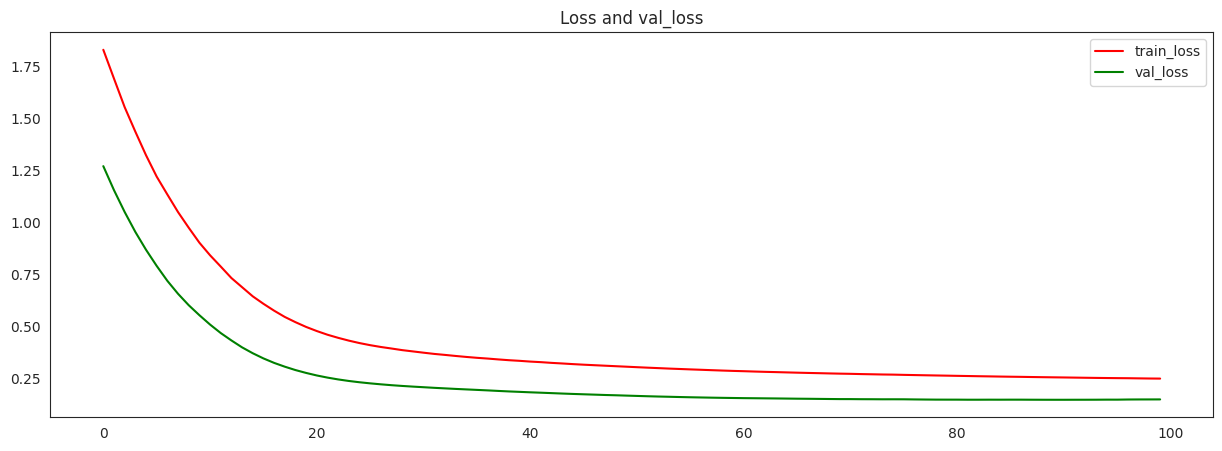

In [26]:
plot_function(history1)

#### Model 2

In [27]:
model2 = Sequential()
model2.add(Dense(32, input_shape=(4,), activation='relu'))
model2.add(Dense(1, activation=None))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(loss = tf.keras.losses.MeanSquaredError() ,optimizer = 'adam',metrics = ['mse'])
history2 = model2.fit(x_train,y_train,epochs = 75,batch_size = 80,validation_data = (x_val,y_val))

Epoch 1/75
14/14 [==============================] - 2s 39ms/step - loss: 0.8737 - mse: 0.8737 - val_loss: 0.4441 - val_mse: 0.4441
Epoch 2/75
14/14 [==============================] - 0s 14ms/step - loss: 0.6533 - mse: 0.6533 - val_loss: 0.3179 - val_mse: 0.3179
Epoch 3/75
14/14 [==============================] - 0s 12ms/step - loss: 0.5048 - mse: 0.5048 - val_loss: 0.2488 - val_mse: 0.2488
Epoch 4/75
14/14 [==============================] - 0s 12ms/step - loss: 0.4197 - mse: 0.4197 - val_loss: 0.2028 - val_mse: 0.2028
Epoch 5/75
14/14 [==============================] - 0s 12ms/step - loss: 0.3580 - mse: 0.3580 - val_loss: 0.1804 - val_mse: 0.1804
Epoch 6/75
14/14 [==============================] - 0s 13ms/step - loss: 0.3280 - mse: 0.3280 - val_loss: 0.1693 - val_mse: 0.1693
Epoch 7/75
14/14 [==============================] - 0s 12ms/step - loss: 0.3115 - mse: 0.3115 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 8/75
14/14 [==============================] - 0s 18ms/step - loss: 0.2972 - m

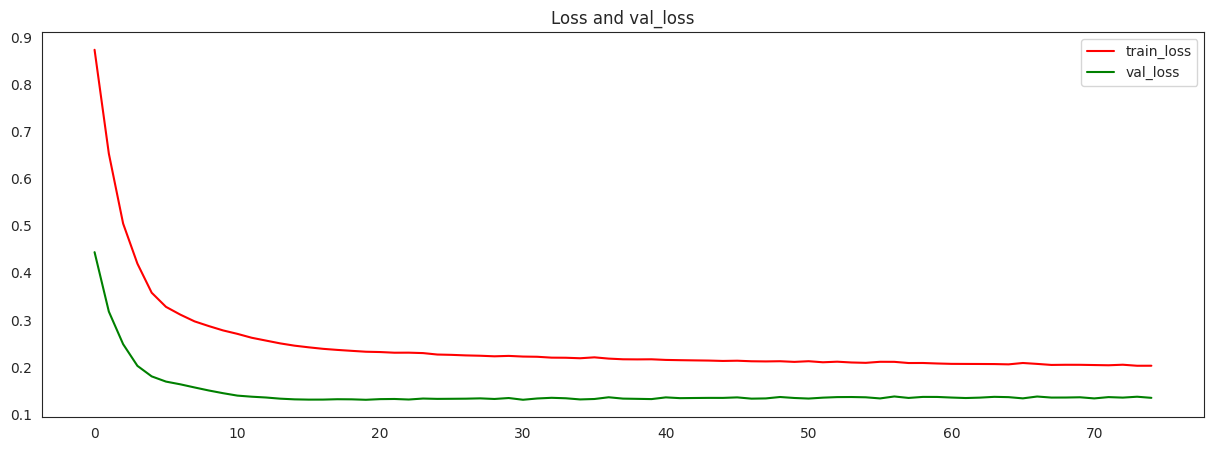

In [29]:
plot_function(history2)

#### Model 3

In [30]:
model3 = Sequential()
model3.add(Dense(8, input_shape=(4,), activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation=None))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,401
Trainable params: 1,401
Non-traina

In [31]:
model3.compile(loss = tf.keras.losses.MeanSquaredError() ,optimizer = 'adam',metrics = ['mse'])
history3 = model3.fit(x_train,y_train,epochs = 50,batch_size = 128,validation_data = (x_val,y_val))

Epoch 1/50
9/9 [==============================] - 3s 49ms/step - loss: 1.1031 - mse: 1.1031 - val_loss: 0.6905 - val_mse: 0.6905
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 1.0126 - mse: 1.0126 - val_loss: 0.6197 - val_mse: 0.6197
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.9037 - mse: 0.9037 - val_loss: 0.5129 - val_mse: 0.5129
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7667 - mse: 0.7667 - val_loss: 0.4092 - val_mse: 0.4092
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6291 - mse: 0.6291 - val_loss: 0.3163 - val_mse: 0.3163
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5020 - mse: 0.5020 - val_loss: 0.2471 - val_mse: 0.2471
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4008 - mse: 0.4008 - val_loss: 0.2064 - val_mse: 0.2064
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3359 - mse: 0.3359 - val

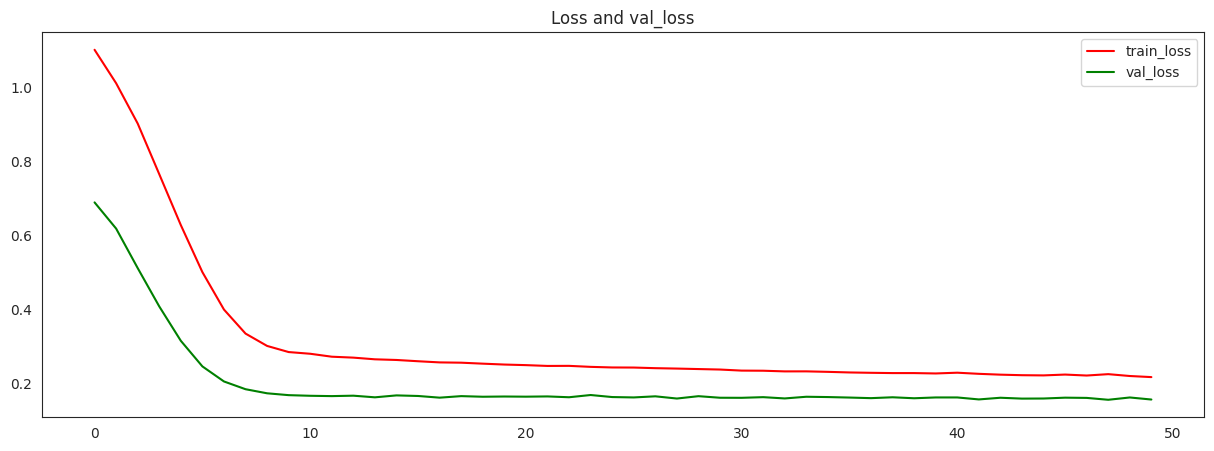

In [32]:
plot_function(history3)

Model 1 performs the best, hence checking loss on test data:

In [33]:
loss1 = model1.evaluate(x_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss1[0]}")

Mean Squared Error on Test Data: 0.1773124486207962


---
## Task 2: Classification

### Classification using ANN

In [34]:
heart = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_02/heart_dataset01.csv")

In [35]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
s_col = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'oldpeak', 'slope', 'ca', 'thal']
for i in s_col:
    scaler = StandardScaler()
    heart[i] = scaler.fit_transform(heart[i].values.reshape(-1,1))

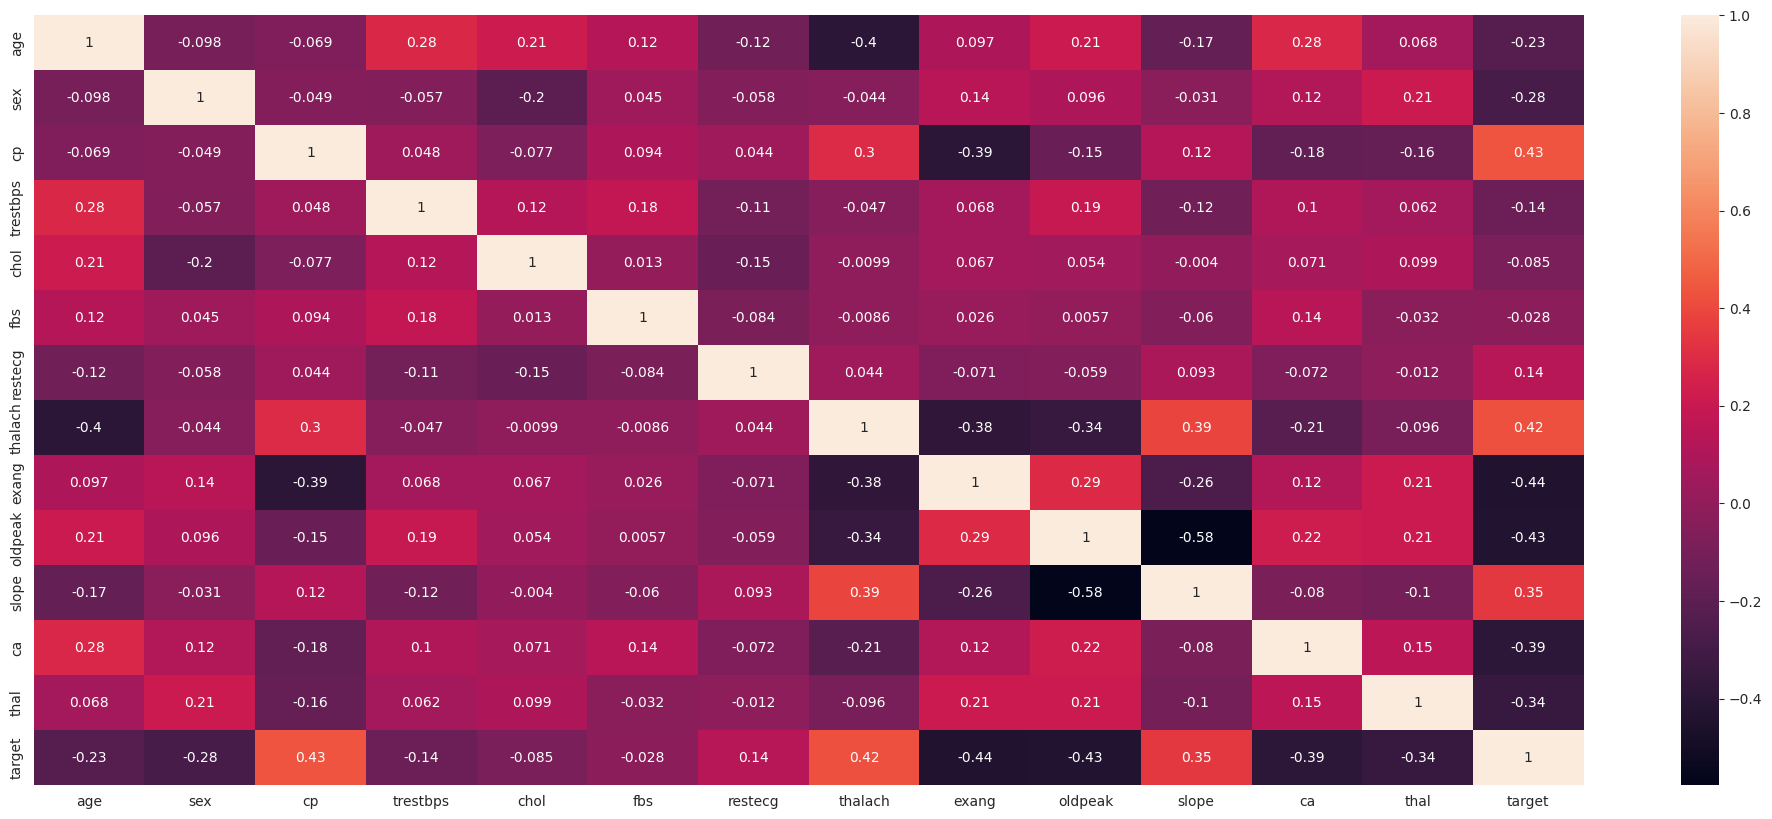

In [37]:
plt.figure(figsize = (25,10))
sb.heatmap(heart.corr(),annot = True);

In [38]:
x4 = heart.iloc[:,:-1]
y4 = heart['target']

In [39]:
x_train,x_part,y_train,y_part = train_test_split(x4,y4,test_size = 0.25,random_state = 67)
x_test,x_val,y_test,y_val = train_test_split(x_part,y_part,test_size = 0.4,random_state = 67)

In [40]:
def plot_loss_accuracy(history):
    fig,ax = plt.subplots(1,2,figsize = (25,5))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'],color = 'orange',label = 'train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'],color = 'black',label = 'val_accuarcy')
    ax[1].legend()

In [41]:
x_train.shape

(227, 13)

#### Classification Model 1

In [42]:
model4 = Sequential()
model4.add(Dense(16, input_shape=(13,), activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                224       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [43]:
model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history4 = model4.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_val,y_val))

Epoch 1/100
8/8 [==============================] - 1s 60ms/step - loss: 0.7083 - accuracy: 0.5771 - val_loss: 0.8382 - val_accuracy: 0.3871
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6751 - accuracy: 0.6079 - val_loss: 0.8044 - val_accuracy: 0.3871
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6468 - accuracy: 0.6344 - val_loss: 0.7753 - val_accuracy: 0.4839
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6231 - accuracy: 0.6608 - val_loss: 0.7502 - val_accuracy: 0.5161
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6021 - accuracy: 0.7004 - val_loss: 0.7321 - val_accuracy: 0.5161
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5853 - accuracy: 0.7004 - val_loss: 0.7163 - val_accuracy: 0.5161
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5682 - accuracy: 0.7181 - val_loss: 0.7024 - val_accuracy: 0.5161
Epoch 8/100
8/8 [===

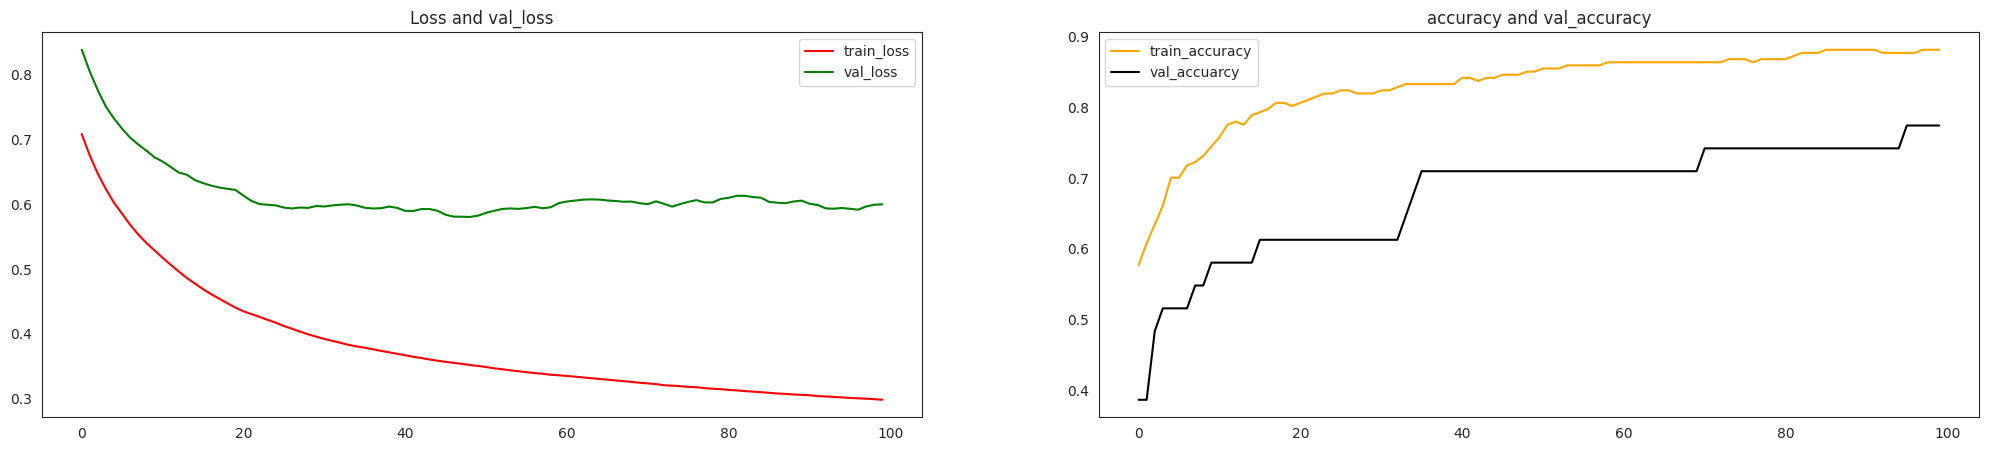

In [44]:
plot_loss_accuracy(history4)

#### Classification Model 2

In [45]:
model5 = Sequential()
model5.add(Dense(32, input_shape=(13,), activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [46]:
model5.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history5 = model5.fit(x_train,y_train,epochs = 50,batch_size = 100,validation_data = (x_val,y_val))

Epoch 1/50
3/3 [==============================] - 1s 102ms/step - loss: 0.7872 - accuracy: 0.3833 - val_loss: 0.6766 - val_accuracy: 0.5806
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7680 - accuracy: 0.3921 - val_loss: 0.6718 - val_accuracy: 0.6129
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.7498 - accuracy: 0.4097 - val_loss: 0.6670 - val_accuracy: 0.6129
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7335 - accuracy: 0.4141 - val_loss: 0.6619 - val_accuracy: 0.6129
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7171 - accuracy: 0.4449 - val_loss: 0.6574 - val_accuracy: 0.6129
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7020 - accuracy: 0.4802 - val_loss: 0.6537 - val_accuracy: 0.5484
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6873 - accuracy: 0.5242 - val_loss: 0.6502 - val_accuracy: 0.5806
Epoch 8/50
3/3 [==========

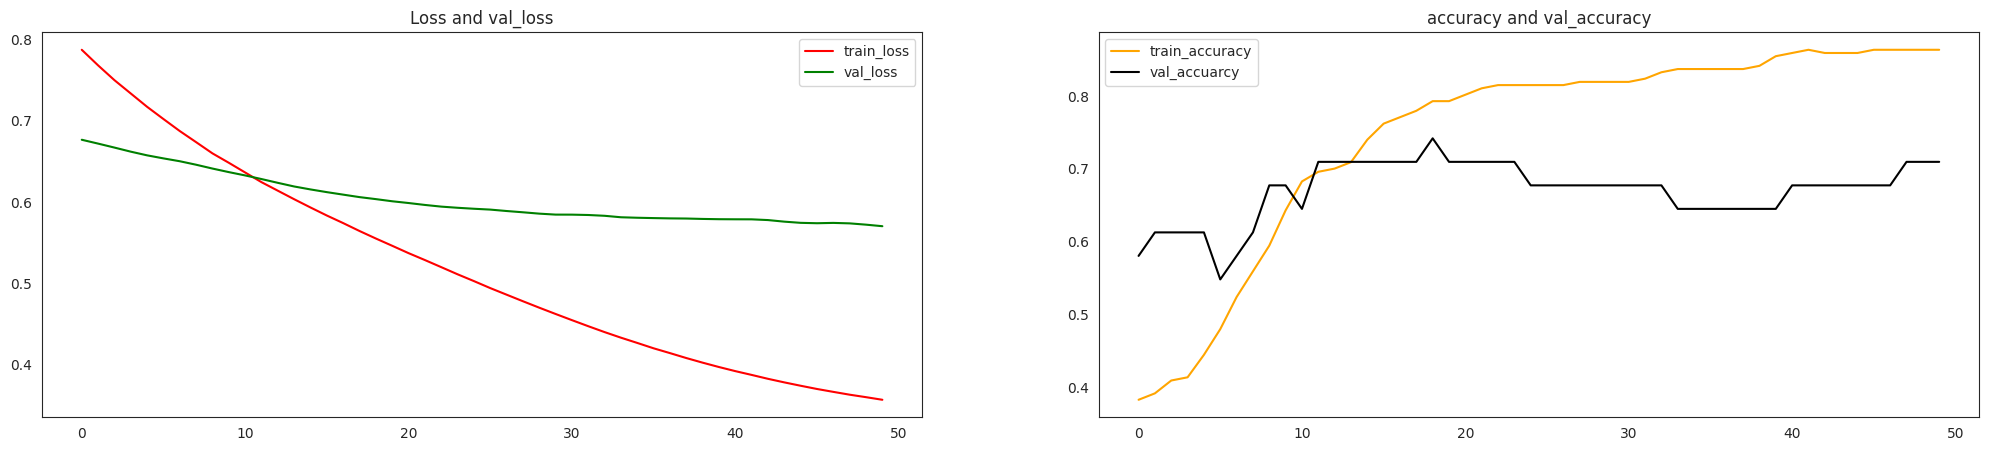

In [47]:
plot_loss_accuracy(history5)

#### Classification Model 3

In [48]:
model6 = Sequential()
model6.add(Dense(8, input_shape=(13,), activation='relu'))
model6.add(Dense(16, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 112       
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [49]:
model6.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history6 = model6.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_val,y_val))

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.7222 - accuracy: 0.4141 - val_loss: 0.6533 - val_accuracy: 0.7419
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5903 - val_loss: 0.6461 - val_accuracy: 0.7742
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.7533 - val_loss: 0.6407 - val_accuracy: 0.7742
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.7401 - val_loss: 0.6375 - val_accuracy: 0.6774
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.7577 - val_loss: 0.6350 - val_accuracy: 0.6452
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5950 - accuracy: 0.7489 - val_loss: 0.6288 - val_accuracy: 0.6774
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.7753 - val_loss: 0.6167 - val_accuracy: 0.7419
Epoch 8/100
8/8 [=========

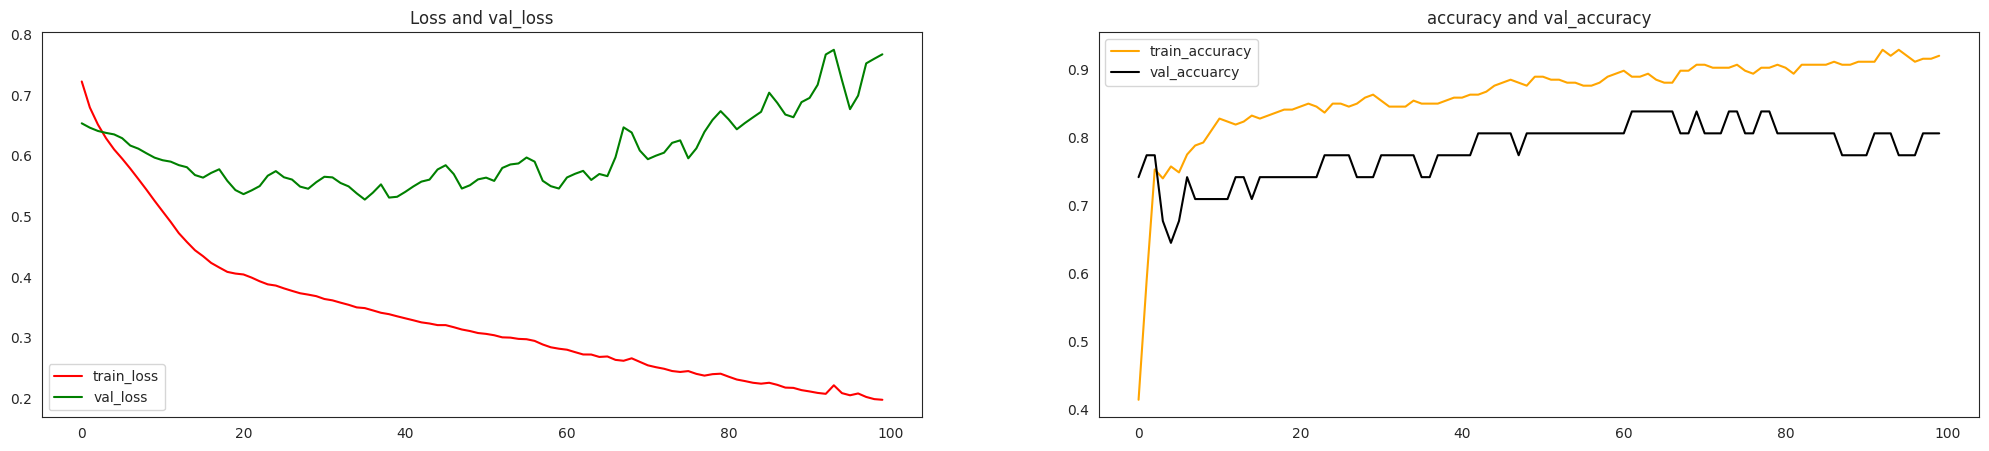

In [50]:
plot_loss_accuracy(history6)

Classification Model 1 performs the best, hence checking accuracy on test data:

In [51]:
loss4 = model4.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test data: {loss4[1]:.2f}")

Accuracy on test data: 0.82
